In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rosenbrock function and its gradient
def rosenbrock(x, y):
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

def rosenbrock_grad(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x ** 2)
    dy = 200 * (y - x ** 2)
    return np.array([dx, dy])

In [2]:
Adam_history = []
SGD_history = []
Dijkstra_history = []

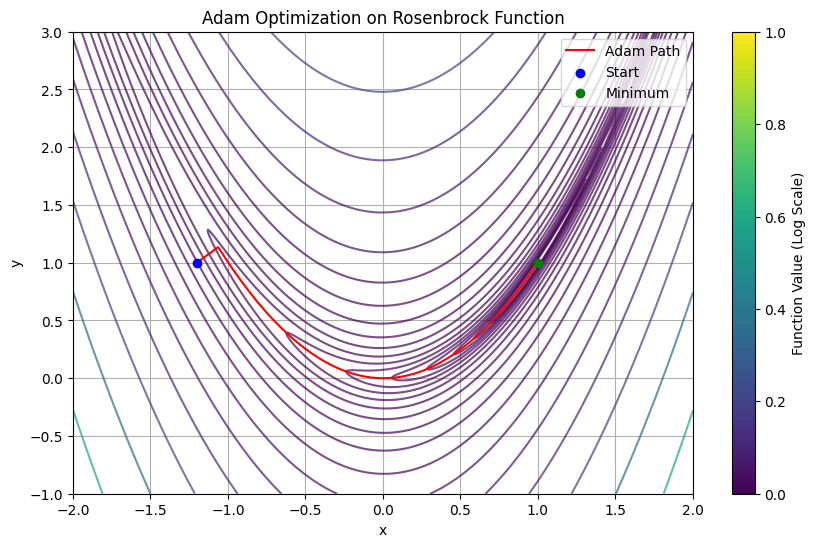

In [3]:

# Adam optimizer implementation
def adam_optimizer(func_grad, init_params, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, steps=10000):
    x, y = init_params
    m = np.zeros(2)  # First moment vector
    v = np.zeros(2)  # Second moment vector
    t = 0
    history = []
    
    for _ in range(steps):
        t += 1
        grad = func_grad(x, y)
        
        # Update biased first moment estimate
        m = beta1 * m + (1 - beta1) * grad
        
        # Update biased second raw moment estimate
        v = beta2 * v + (1 - beta2) * (grad ** 2)
        
        # Compute bias-corrected first moment estimate
        m_hat = m / (1 - beta1 ** t)
        
        # Compute bias-corrected second raw moment estimate
        v_hat = v / (1 - beta2 ** t)
        
        # Update parameters
        x -= lr * m_hat[0] / (np.sqrt(v_hat[0]) + epsilon)
        y -= lr * m_hat[1] / (np.sqrt(v_hat[1]) + epsilon)
        
        history.append((x, y))
        
        # Break early if gradient norm is small
        if np.linalg.norm(grad) < 1e-6:
            break

    return np.array(history)

# Initial parameters and optimization
init_params = np.array([-1.2, 1.0])  # Start point far from the minimum
history = adam_optimizer(rosenbrock_grad, init_params)

# Plotting Rosenbrock function and optimization path
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-1, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)

plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 20), cmap='viridis', alpha=0.7)
plt.plot(history[:, 0], history[:, 1], 'r-', label="Adam Path")
plt.scatter(*init_params, color='blue', label="Start", zorder=5)
plt.scatter(1, 1, color='green', label="Minimum", zorder=5)
plt.title("Adam Optimization on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.colorbar(label='Function Value (Log Scale)')
plt.grid(True)
plt.show()

In [4]:
Adam_history = history

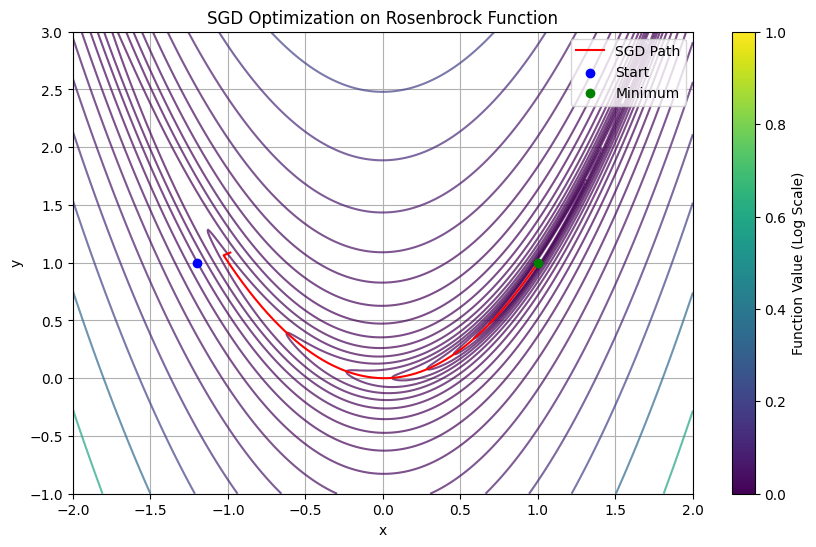

In [5]:
# SGD optimizer implementation
def sgd_optimizer(func_grad, init_params, lr=0.001, steps=10000):
    x, y = init_params
    history = []
    
    for _ in range(steps):
        grad = func_grad(x, y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        history.append((x, y))
        
        # Break early if gradient norm is small
        if np.linalg.norm(grad) < 1e-6:
            break

    return np.array(history)

# Initial parameters and optimization
init_params = np.array([-1.2, 1.0])  # Start point far from the minimum
history = sgd_optimizer(rosenbrock_grad, init_params)

# Plotting Rosenbrock function and optimization path
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 20), cmap='viridis', alpha=0.7)
plt.plot(history[:, 0], history[:, 1], 'r-', label="SGD Path")
plt.scatter(*init_params, color='blue', label="Start", zorder=5)
plt.scatter(1, 1, color='green', label="Minimum", zorder=5)
plt.title("SGD Optimization on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()    
plt.colorbar(label='Function Value (Log Scale)')
plt.grid(True)
plt.show()

In [6]:
SGD_history = history

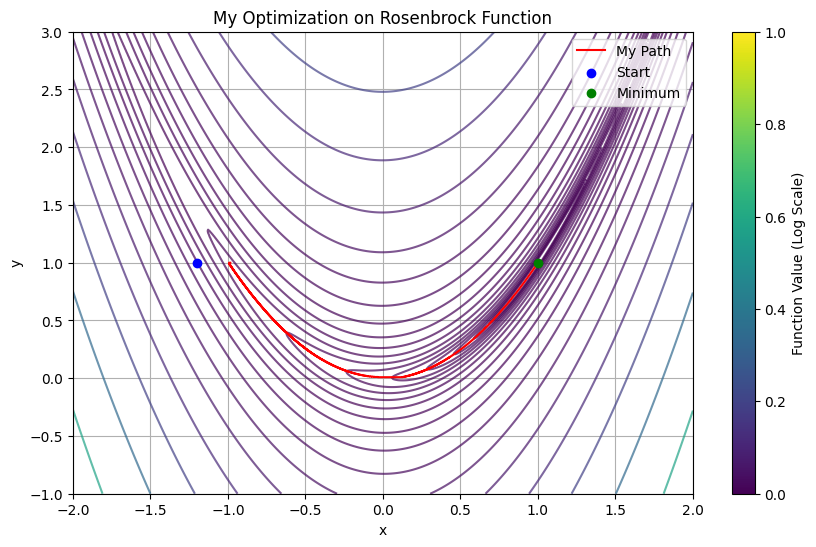

In [7]:
# My optimizer implementation
def Dijkstra_optimizer(func_grad, init_params, lr=0.001, steps=10000, influence_thresh=0.1):
    """
    Incremental optimizer inspired by Dijkstra's algorithm.

    Parameters:
    - func_grad: Function that computes gradients of the objective function.
    - init_params: Initial parameters (x, y).
    - lr: Learning rate for gradient updates.
    - steps: Maximum number of optimization steps.
    - influence_thresh: Threshold to determine "most influential" gradient components.

    Returns:
    - history: Array of parameter values at each step.
    """
    x, y = init_params
    params = np.array([x, y])
    history = []
    
    for step in range(steps):
        # Compute gradients
        grad = func_grad(params[0], params[1])
        
        # Compute influence (absolute gradient values)
        influence = np.abs(grad)
        
        # Determine the "most influential" parameter
        max_influence_idx = np.argmax(influence)
        
        # Update only the parameter with the most influence
        if influence[max_influence_idx] > influence_thresh:
            params[max_influence_idx] -= lr * grad[max_influence_idx]
        else:
            # Perform a fallback update for all parameters if influence is below threshold
            params -= lr * grad

        # Record the current parameter values
        history.append(params.copy())
        
        # Break early if gradient norm is small
        if np.linalg.norm(grad) < 1e-6:
            print(f"Converged in {step} steps.")
            break

    return np.array(history)


# Initial parameters and optimization
init_params = np.array([-1.2, 1.0])  # Start point far from the minimum
history = Dijkstra_optimizer(rosenbrock_grad, init_params)

# Plotting Rosenbrock function and optimization path
plt.figure(figsize=(10, 6))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3.5, 20), cmap='viridis', alpha=0.7)
plt.plot(history[:, 0], history[:, 1], 'r-', label="My Path")
plt.scatter(*init_params, color='blue', label="Start", zorder=5)
plt.scatter(1, 1, color='green', label="Minimum", zorder=5)
plt.title("My Optimization on Rosenbrock Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()    
plt.colorbar(label='Function Value (Log Scale)')
plt.grid(True)
plt.show()

In [8]:
Dijkstra_history = history

In [9]:
print(f"steps: Adam={len(Adam_history)}, SGD={len(SGD_history)}, Dijkstra={len(Dijkstra_history)}")

steps: Adam=10000, SGD=10000, Dijkstra=10000


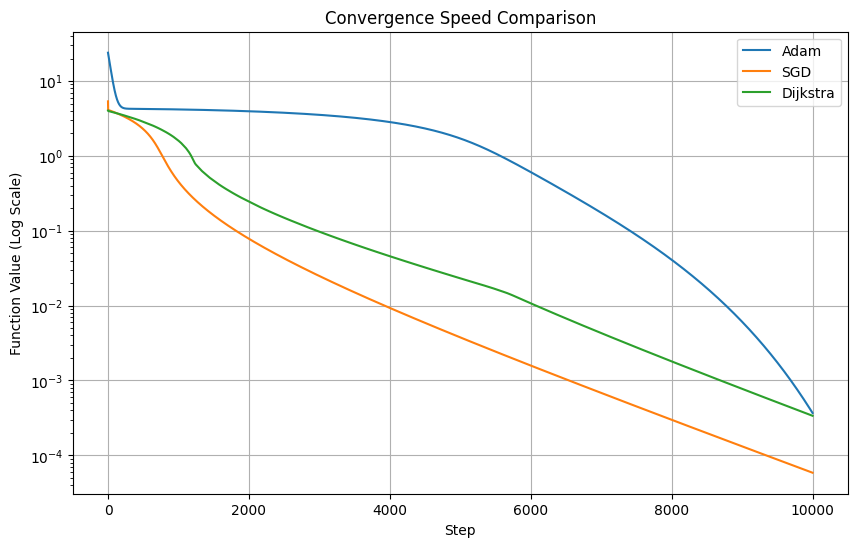

In [10]:
# 收斂速度與步數

plt.figure(figsize=(10, 6))
plt.plot(range(len(Adam_history)), [rosenbrock(*params) for params in Adam_history], label="Adam")
plt.plot(range(len(SGD_history)), [rosenbrock(*params) for params in SGD_history], label="SGD")
plt.plot(range(len(Dijkstra_history)), [rosenbrock(*params) for params in Dijkstra_history], label="Dijkstra")
plt.yscale("log")
plt.title("Convergence Speed Comparison")
plt.xlabel("Step")
plt.ylabel("Function Value (Log Scale)")
plt.legend()
plt.grid(True)
plt.show()

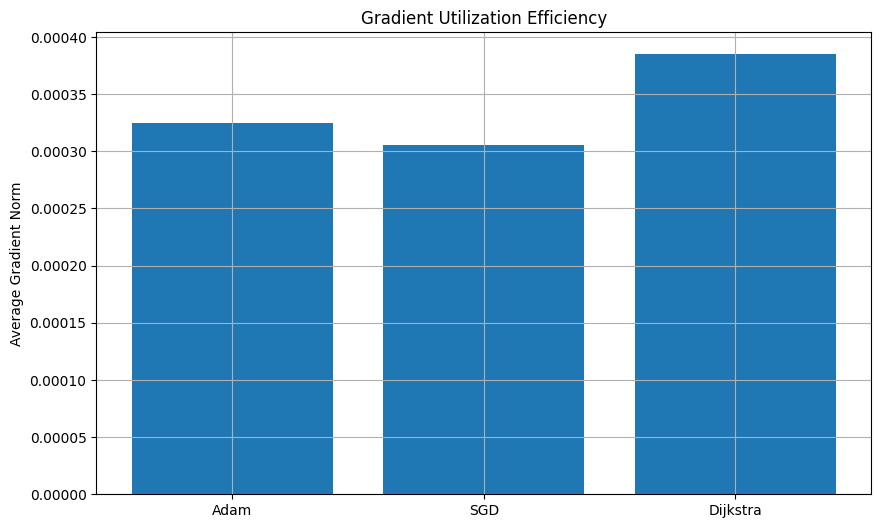

In [11]:
# 梯度利用效率

def gradient_efficiency(history):
    return np.linalg.norm(np.diff(history, axis=0), axis=1).mean()

# plot efficiency

plt.figure(figsize=(10, 6))
plt.bar(["Adam", "SGD", "Dijkstra"], [gradient_efficiency(Adam_history), gradient_efficiency(SGD_history), gradient_efficiency(Dijkstra_history)])
plt.title("Gradient Utilization Efficiency")
plt.ylabel("Average Gradient Norm")
plt.grid(True)
plt.show()

In [12]:
# 性能指標 (總損失變化量, 平均損失變化率, 收斂效率)

def performance_metrics(history):
    total_loss_change = rosenbrock(*history[0]) - rosenbrock(*history[-1])
    avg_loss_change = total_loss_change / len(history)
    convergence_efficiency = avg_loss_change / gradient_efficiency(history)
    return total_loss_change, avg_loss_change, convergence_efficiency

print("Adam:", performance_metrics(Adam_history))
print("SGD:", performance_metrics(SGD_history))
print("Dijkstra:", performance_metrics(Dijkstra_history))

Adam: (23.897276517381787, 0.0023897276517381785, 7.350469398451004)
SGD: (5.352853052401063, 0.0005352853052401062, 1.7507891902735657)
Dijkstra: (4.033337329449947, 0.0004033337329449947, 1.0478880130788362)
